In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from matplotlib_venn import venn2, venn3

from wordcloud import WordCloud, STOPWORDS


pd.options.display.float_format = '{:,.4f}'.format
%matplotlib inline

sns.set(style="ticks")
sns.set_style("darkgrid")

In [2]:
# pip install matplotlib_venn

In [3]:
import seaborn as sns
sns.__version__

'0.11.1'

In [4]:
# pip install seaborn -U

Import in data frames

In [5]:
combined_reviews_fname = 'sp-&-p4k_combined-2017-utf8sig-final.csv'

sp_p4k_2017_df = pd.read_csv(combined_reviews_fname, index_col = 0)

## vectorized
alb_recs_high_danc_anand = pd.read_csv("alb_recs_high_danc_anand_vec.csv", index_col = 0)
alb_recs_high_danc_lina = pd.read_csv("alb_recs_high_danc_lina_vec.csv", index_col = 0)
alb_recs_high_danc_andres = pd.read_csv("alb_recs_high_danc_andres_vec.csv", index_col = 0)

alb_recs_high_instr_anand = pd.read_csv("alb_recs_high_instr_anand_vec.csv", index_col = 0)
alb_recs_high_instr_lina = pd.read_csv("alb_recs_high_instr_lina_vec.csv", index_col = 0)
alb_recs_high_instr_andres = pd.read_csv("alb_recs_high_instr_andres_vec.csv", index_col = 0)

# # not vectorized
# alb_recs_high_danc_anand = pd.read_csv("alb_recs_high_danc_anand.csv", index_col = 0)
# alb_recs_high_danc_lina = pd.read_csv("alb_recs_high_danc_lina.csv", index_col = 0)
# alb_recs_high_danc_andres = pd.read_csv("alb_recs_high_danc_andres.csv", index_col = 0)

# alb_recs_high_instr_anand = pd.read_csv("alb_recs_high_instr_anand.csv", index_col = 0)
# alb_recs_high_instr_lina = pd.read_csv("alb_recs_high_instr_lina.csv", index_col = 0)
# alb_recs_high_instr_andres = pd.read_csv("alb_recs_high_instr_andres.csv", index_col = 0)

In [6]:
alb_recs_high_danc_anand.head(100).describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,is_explicit,best,score,distance
count,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,0.2188,0.6843,0.6191,0.4325,0.1587,0.1578,0.0834,0.5844,0.4980,0.2263,"3,066,282.4600",1.0700,0.0500,7.2150,0.9833
std,0.1340,0.0567,0.0988,0.2691,0.0456,0.0351,0.0496,0.0384,0.1165,0.1337,"2,050,669.2395",3.4060,0.2190,0.8193,0.1240
min,0.0052,0.5720,0.4022,0.0000,0.0838,0.0852,0.0270,0.4758,0.2333,0.0133,"442,128.0000",0.0000,0.0000,5.1000,0.5137
25%,0.1253,0.6436,0.5492,0.2201,0.1228,0.1337,0.0476,0.5594,0.4056,0.1215,"2,234,519.2500",0.0000,0.0000,6.8000,0.9071
50%,0.2064,0.6839,0.6201,0.4002,0.1491,0.1502,0.0647,0.5826,0.4917,0.2200,"2,644,292.0000",0.0000,0.0000,7.3000,1.0090
75%,0.2944,0.7202,0.6795,0.6625,0.1926,0.1856,0.1054,0.6104,0.5782,0.3085,"3,318,046.0000",0.0000,0.0000,7.7000,1.0878
max,0.5696,0.8217,0.8385,0.9112,0.2907,0.2293,0.2577,0.6968,0.8123,0.5677,"16,584,080.0000",18.0000,1.0000,9.3000,1.1277


In [7]:
alb_recs_high_danc_andres.head(100).describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,is_explicit,best,score,distance
count,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,0.1773,0.7372,0.6370,0.4494,0.1570,0.1529,0.1174,0.5890,0.4590,0.2212,"2,904,601.3100",3.0000,0.0400,7.1700,1.0997
std,0.1307,0.0487,0.1239,0.3397,0.0534,0.0423,0.0766,0.0382,0.1307,0.1468,"1,484,194.7890",5.7349,0.1969,0.7378,0.1690
min,0.0052,0.6468,0.4022,0.0000,0.0801,0.0708,0.0393,0.4843,0.1763,0.0060,"442,128.0000",0.0000,0.0000,5.1000,0.6158
25%,0.0675,0.7065,0.5444,0.0712,0.1226,0.1199,0.0582,0.5645,0.3671,0.1017,"2,216,470.2500",0.0000,0.0000,6.8000,0.9420
50%,0.1614,0.7304,0.6408,0.5027,0.1461,0.1484,0.0941,0.5856,0.4550,0.2068,"2,581,277.5000",0.0000,0.0000,7.2500,1.1625
75%,0.2469,0.7645,0.7325,0.7820,0.1864,0.1853,0.1573,0.6200,0.5437,0.3184,"3,352,609.2500",1.0000,0.0000,7.6000,1.2474
max,0.5236,0.8677,0.9183,0.9327,0.3585,0.2570,0.3854,0.6657,0.8123,0.5677,"10,356,851.0000",19.0000,1.0000,8.8000,1.2970


In [8]:
alb_recs_high_danc_lina.head(100).describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,is_explicit,best,score,distance
count,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,0.1924,0.7425,0.6222,0.0419,0.1807,0.1229,0.1766,0.5818,0.4949,0.4330,"3,048,603.8300",9.1600,0.0600,7.0670,0.9284
std,0.0973,0.0580,0.0911,0.0962,0.0505,0.0344,0.0933,0.0483,0.1252,0.1179,"1,338,602.9560",7.0707,0.2387,1.1259,0.1785
min,0.0052,0.6437,0.4171,0.0000,0.0844,0.0575,0.0381,0.4758,0.2482,0.1620,"192,496.0000",0.0000,0.0000,2.8000,0.5136
25%,0.1199,0.7023,0.5712,0.0000,0.1435,0.1005,0.0965,0.5505,0.4147,0.3692,"2,342,993.2500",1.0000,0.0000,6.5000,0.8029
50%,0.1773,0.7381,0.6231,0.0004,0.1747,0.1160,0.1852,0.5793,0.4740,0.4339,"2,944,405.5000",11.0000,0.0000,7.2000,0.9349
75%,0.2501,0.7789,0.6721,0.0276,0.2126,0.1364,0.2414,0.6153,0.5782,0.5050,"3,580,410.2500",15.0000,0.0000,7.7000,1.0822
max,0.4628,0.8997,0.8296,0.5049,0.3755,0.2570,0.4098,0.7135,0.8246,0.7350,"10,367,174.0000",24.0000,1.0000,10.0000,1.1867


## How well do we predict album recommendations?

Line chart of distances for all 3 users.

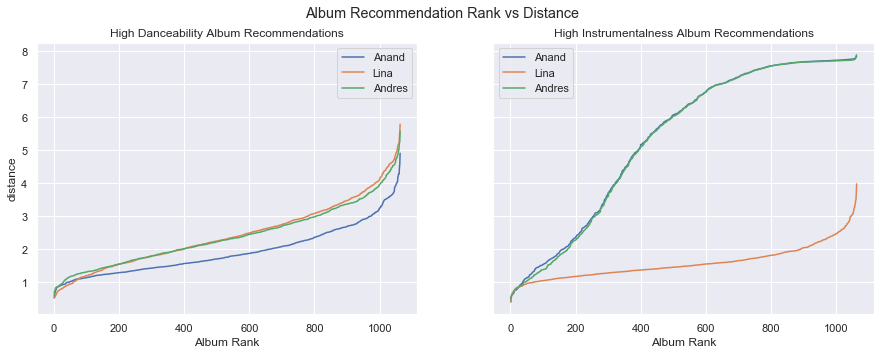

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Album Recommendation Rank vs Distance')

# Bulbasaur
# sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
sns.lineplot(ax=axes[0], x = list(range(1, alb_recs_high_danc_anand.shape[0] + 1)), y=alb_recs_high_danc_anand["distance"], label = 'Anand')
sns.lineplot(ax=axes[0], x = list(range(1, alb_recs_high_danc_anand.shape[0] + 1)), y=alb_recs_high_danc_lina["distance"], label = 'Lina')
sns.lineplot(ax=axes[0], x = list(range(1, alb_recs_high_danc_anand.shape[0] + 1)), y=alb_recs_high_danc_andres["distance"], label = 'Andres')
axes[0].set_title('High Danceability Album Recommendations')
axes[0].set_xlabel('Album Rank')
axes[0].legend()

# # Charmander
# sns.barplot(ax=axes[1], x=charmander.index, y=charmander.values)
sns.lineplot(ax=axes[1], x = list(range(1, alb_recs_high_instr_anand.shape[0] + 1)), y=alb_recs_high_instr_anand["distance"], label = 'Anand')
sns.lineplot(ax=axes[1], x = list(range(1, alb_recs_high_danc_anand.shape[0] + 1)), y=alb_recs_high_instr_lina["distance"], label = 'Lina')
sns.lineplot(ax=axes[1], x = list(range(1, alb_recs_high_danc_anand.shape[0] + 1)), y=alb_recs_high_instr_andres["distance"], label = 'Andres')
axes[1].set_xlabel('Album Rank')
axes[1].set_title('High Instrumentalness Album Recommendations')
axes[1].legend()



## What does Pitchfork think of our music taste?

What genres are recommended? We look at our top 100 recommendations only.

In [10]:
alb_recs_high_danc_lina.head(100).genre.value_counts()

Rap           64
Pop/R&B       15
Rock           8
Electronic     7
Global         3
None           2
Jazz           1
Name: genre, dtype: int64

**Combine our datasets**

In [11]:
combined_alb_recs_hDanc_100 = pd.concat([alb_recs_high_danc_anand.head(100), alb_recs_high_danc_lina.head(100), alb_recs_high_danc_andres.head(100)], ignore_index=False)
combined_alb_recs_hDanc_100.describe()
# combined_alb_recs_hDanc_100.username.value_counts()

combined_alb_recs_hInstr_100 = pd.concat([alb_recs_high_instr_anand.head(100), alb_recs_high_instr_lina.head(100), alb_recs_high_instr_andres.head(100)], ignore_index=False)
# combined_alb_recs_hInstr_100

**Genre Studies:**

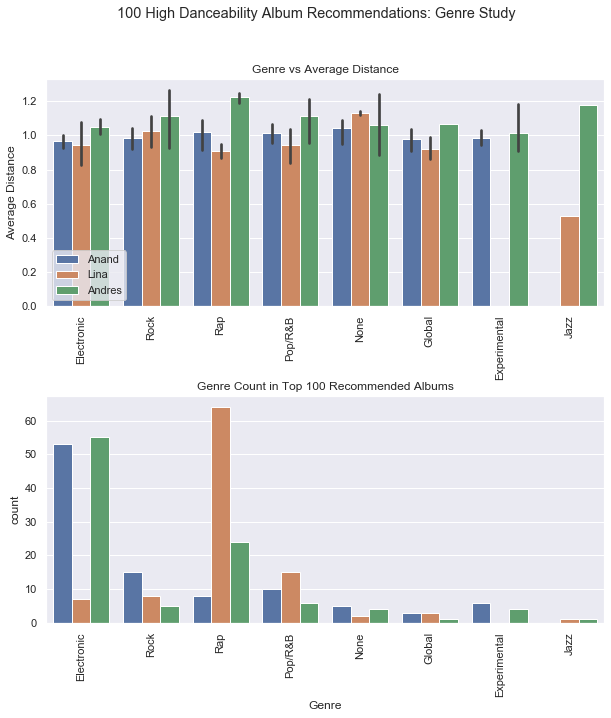

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(hspace = .4)
fig.suptitle('100 High Danceability Album Recommendations: Genre Study')

# Plot 1
sns.barplot(ax=axes[0], x="genre", y="distance", hue="username", data=combined_alb_recs_hDanc_100)
axes[0].set_title('Genre vs Average Distance')
axes[0].set_xlabel('Genre')
axes[0].get_xaxis().get_label().set_visible(False)
axes[0].set_ylabel('Average Distance')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical');
axes[0].legend(loc = 'lower left')

# # # Plot 2
sns.countplot(ax=axes[1], x="genre", hue="username", data=combined_alb_recs_hDanc_100)
axes[1].set_title('Genre Count in Top 100 Recommended Albums')
axes[1].set_xlabel('Genre')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical');
axes[1].get_legend().remove()


# plt.grid()  #just add this

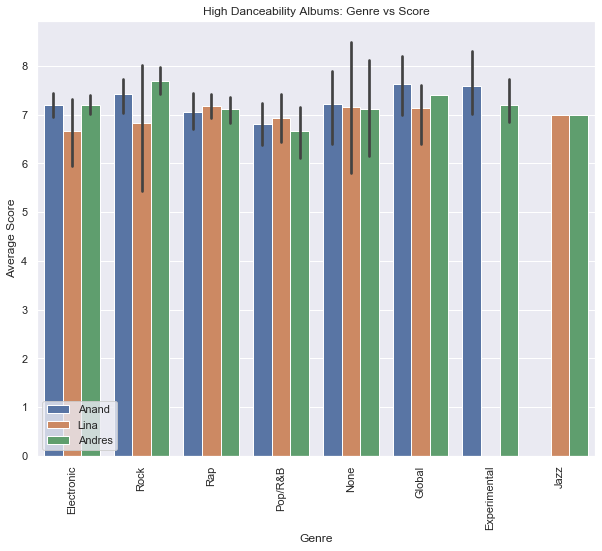

In [13]:
# # Genre vs Score: High Danceability
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0, 10, 1))
g = sns.barplot(x="genre", y="score", hue="username", data=combined_alb_recs_hDanc_100)
g.set_title('High Danceability Albums: Genre vs Score')
g.set_xlabel('Genre')
g.set_ylabel('Average Score')
g.set_xticklabels(g.get_xticklabels(), rotation='vertical');
g.legend(loc = 'lower left');

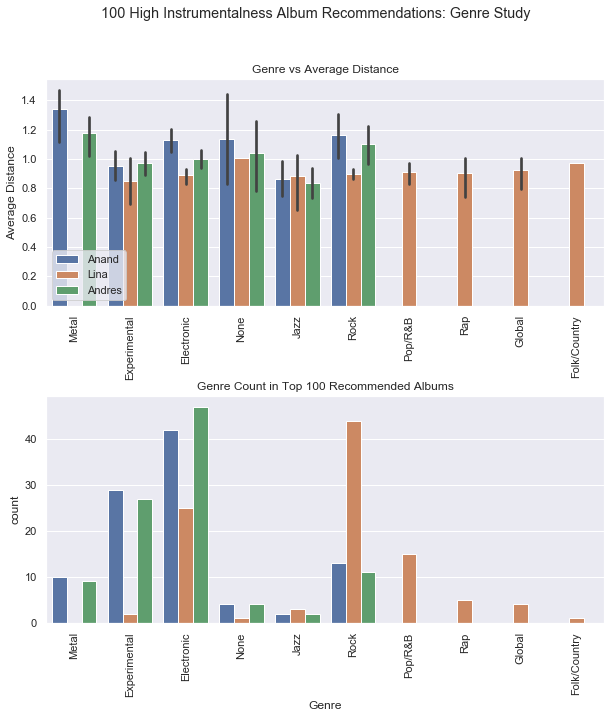

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(hspace = .4)
fig.suptitle('100 High Instrumentalness Album Recommendations: Genre Study')

# Plot 1
sns.barplot(ax=axes[0], x="genre", y="distance", hue="username", data=combined_alb_recs_hInstr_100)
axes[0].set_title('Genre vs Average Distance')
axes[0].set_xlabel('Genre')
axes[0].get_xaxis().get_label().set_visible(False)
axes[0].set_ylabel('Average Distance')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical');
axes[0].legend(loc = 'lower left')

# Plot 2
sns.countplot(ax=axes[1], x="genre", hue="username", data=combined_alb_recs_hInstr_100)
axes[1].set_title('Genre Count in Top 100 Recommended Albums')
axes[1].set_xlabel('Genre')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical');
axes[1].get_legend().remove()

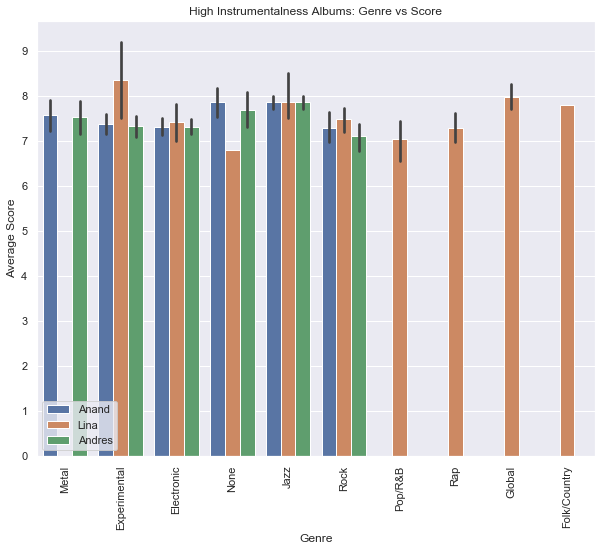

In [15]:
# # Genre vs Score: High Instrumentalness
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0, 10, 1))
g = sns.barplot(x="genre", y="score", hue="username", data=combined_alb_recs_hInstr_100)
g.set_title('High Instrumentalness Albums: Genre vs Score')
g.set_xlabel('Genre')
g.set_ylabel('Average Score')
g.set_xticklabels(g.get_xticklabels(), rotation='vertical');
g.legend(loc = 'lower left');

**Score Studies:
Whose recommendations have the highest scores?**

Who does pitchfork think has the 'best' music taste by score?

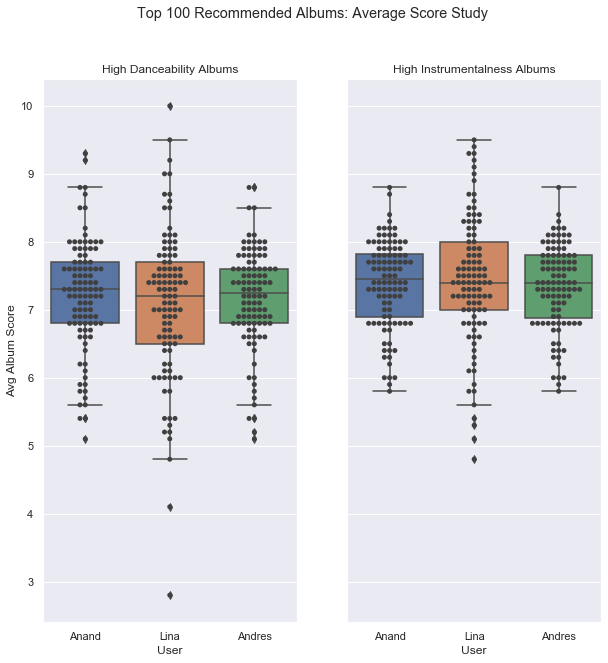

In [16]:
# danceability
# box plot of our 3 avg scores
# plot to show relationship between our distances and score

fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
# fig.subplots_adjust(hspace = .4)
fig.suptitle('Top 100 Recommended Albums: Average Score Study')

# Plot 1
# sns.barplot(ax=axes[0], x="genre", y="distance", hue="username", data=combined_alb_recs_hInstr_100)


sns.boxplot(x="username", y="score", data=combined_alb_recs_hDanc_100, ax = axes[0] )
sns.swarmplot(x="username", y="score", data=combined_alb_recs_hDanc_100, color=".25", ax = axes[0])
axes[0].set_title('High Danceability Albums')
axes[0].set_xlabel('User')
axes[0].set_ylabel('Avg Album Score')
# axes[0].get_yaxis().get_label().set_visible(False)

# # Plot 2: Instrumentalness
sns.boxplot(x="username", y="score", data=combined_alb_recs_hInstr_100, ax = axes[1] )
sns.swarmplot(x="username", y="score", data=combined_alb_recs_hInstr_100, color=".25", ax = axes[1])
axes[1].set_title('High Instrumentalness Albums')
axes[1].set_xlabel('User')
axes[1].set_ylabel('Avg Album Score')
axes[1].get_yaxis().get_label().set_visible(False)


# # Plot 2: Relationship between distance and score
# sns.kdeplot(data=combined_alb_recs_hDanc_100, x="valence",hue ="username",  cut=0, fill=True, 
#             ax=axes[1]).set_title('Distance vs Score')
# sns.jointplot(data=combined_alb_recs_hDanc_100, x="distance", y="score", hue = 'username', kind='kde', ax=axes[1])
# sns.relplot(x="distance", y="score", hue="username", kind="line", data=combined_alb_recs_hDanc_100, ax = axes[1]).set_title('Distance vs Score');
# axes[1].get_legend().remove()

Do our recommendation distances have a relationship with our album scores? 

Are we recommended albums more albums that have lower scores or higher scores?

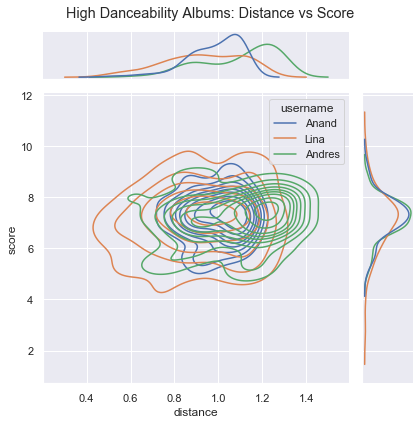

In [17]:
# sns.displot(data=combined_alb_recs_hDanc_100, x="distance", y="score")
g = sns.jointplot(data=combined_alb_recs_hDanc_100, x="distance", y="score", hue = 'username', kind='kde')
g.fig.suptitle('High Danceability Albums: Distance vs Score')
g.ax_joint.collections[0].set_alpha(0)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.92) # Reduce plot to make room

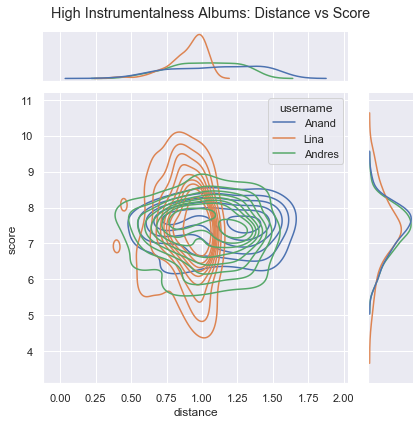

In [18]:
g = sns.jointplot(data=combined_alb_recs_hInstr_100, x="distance", y="score", hue = 'username', kind='kde')
g.fig.suptitle('High Instrumentalness Albums: Distance vs Score')
g.ax_joint.collections[0].set_alpha(0)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.92) # Reduce plot to make room

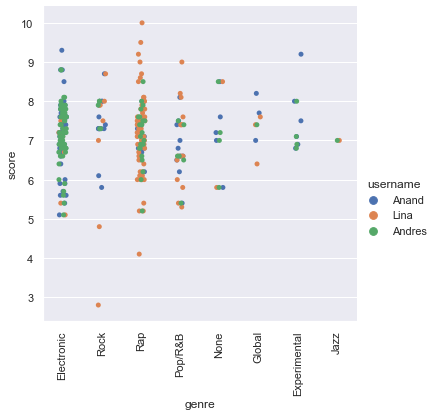

In [19]:
combined_alb_recs_hDanc_100.genre.value_counts()
# temp.hist()
# plt.figure()
# p = combined_alb_recs_hDanc_100.genre.value_counts().hist()

# plt.title('Genre vs. Number of Albums')
# plt.xlabel('Genre')
# plt.ylabel('Number of Albums')

# plt.xticks(rotation='vertical');
# # plt.xticks(very_small_values);


# combined_alb_recs_hDanc_100.genre.value_counts().plot(kind='bar')
sns.catplot(x="genre", y="score", hue="username",  data=combined_alb_recs_hDanc_100)
plt.xticks(rotation='vertical');

**Group Label Analysis:**

Genre vs Group Label for each user.

How would Pitchfork classify our music taste in specific genres?

0.2370756238022422
7.2948259642521185


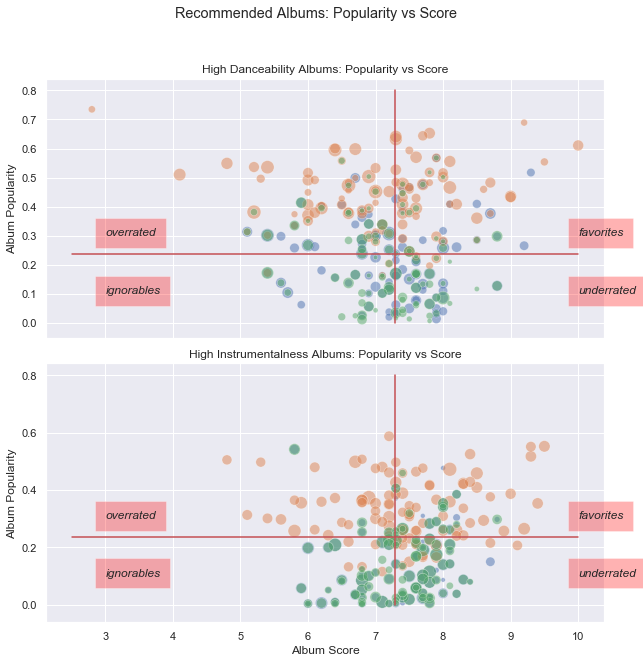

In [20]:
# scatter plot of popularity vs score. Add lines for average popularity and score in pitchfork
mean_score_allData = sp_p4k_2017_df.score.mean()
mean_pop_allData = sp_p4k_2017_df.popularity.mean()/100
print(mean_pop_allData)
print(mean_score_allData)

# size of bubble means smaller distance and better recommendation
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex = True)
# fig.tight_layout()
fig.subplots_adjust(hspace = .1)
fig.suptitle('Recommended Albums: Popularity vs Score')
# g.fig.subplots_adjust(top=1.5) # Reduce plot to make room

# Plot 1
sns.scatterplot(ax=axes[0], x="score", y="popularity", hue="username", size = 'distance', 
                data=combined_alb_recs_hDanc_100, sizes=(200, 20), legend=False, alpha=0.5)

# plot the group_label cutoff lines
axes[0].plot(np.linspace(2.5, 10, 1000), [mean_pop_allData]*1000, color='r')
axes[0].plot([mean_score_allData]*1000, np.linspace(0, .8, 1000), color='r')
axes[0].text(10, .3, 'favorites', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
axes[0].text(10, .1, 'underrated', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
axes[0].text(3, .1, 'ignorables', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
axes[0].text(3, .3, 'overrated', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})


axes[0].set_title('High Danceability Albums: Popularity vs Score')
axes[0].set_xlabel('Album Score')
# axes[0].get_xaxis().get_label().set_visible(False)
axes[0].set_ylabel('Album Popularity')
# axes[0].legend(loc = 'lower left')

# Plot 2
sns.scatterplot(ax=axes[1], x="score", y="popularity", hue="username", size = 'distance', 
                data=combined_alb_recs_hInstr_100, sizes=(200, 20), legend=False, alpha=0.5)

# plot the group_label cutoff lines
axes[1].plot(np.linspace(2.5, 10, 1000), [mean_pop_allData]*1000, color='r')
axes[1].plot([mean_score_allData]*1000, np.linspace(0, .8, 1000), color='r')
axes[1].text(10, .3, 'favorites', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
axes[1].text(10, .1, 'underrated', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
axes[1].text(3, .1, 'ignorables', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
axes[1].text(3, .3, 'overrated', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})


axes[1].set_title('High Instrumentalness Albums: Popularity vs Score')
axes[1].set_xlabel('Album Score')
# axes[1].get_xaxis().get_label().set_visible(False)
axes[1].set_ylabel('Album Popularity');
# axes[1].legend(loc = 'lower left')

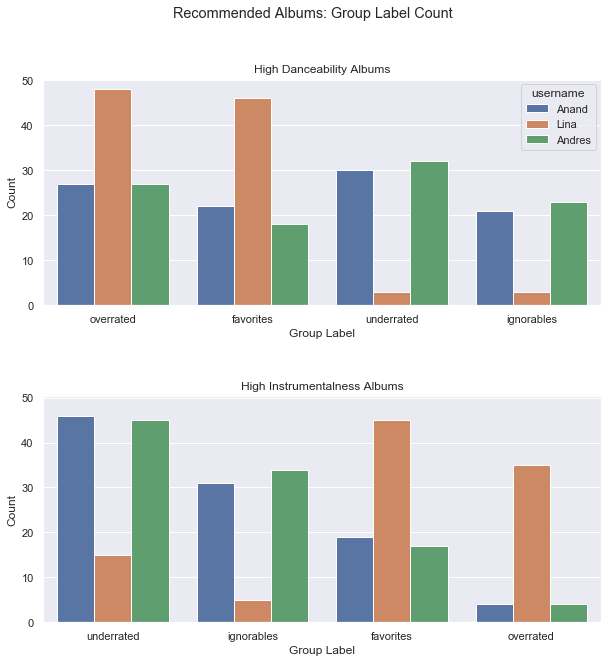

In [21]:
# bar chart to show how many counts per group label
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharey = True)
# fig.tight_layout()
fig.subplots_adjust(hspace = .4)
fig.suptitle('Recommended Albums: Group Label Count')
# g.fig.subplots_adjust(top=1.5) # Reduce plot to make room

# Plot 1
sns.countplot(x="group_label", hue="username", data=combined_alb_recs_hDanc_100, ax = axes[0])

axes[0].set_title('High Danceability Albums')
axes[0].set_xlabel('Group Label')
# axes[0].get_xaxis().get_label().set_visible(False)
axes[0].set_ylabel('Count')
# axes[0].legend(loc = 'lower left')

# Plot 2
sns.countplot(x="group_label", hue="username", data=combined_alb_recs_hInstr_100, ax = axes[1])


axes[1].set_title('High Instrumentalness Albums')
axes[1].set_xlabel('Group Label')
# axes[1].get_xaxis().get_label().set_visible(False)
axes[1].set_ylabel('Count');
# axes[1].legend(loc = 'lower left')
axes[1].get_legend().remove()

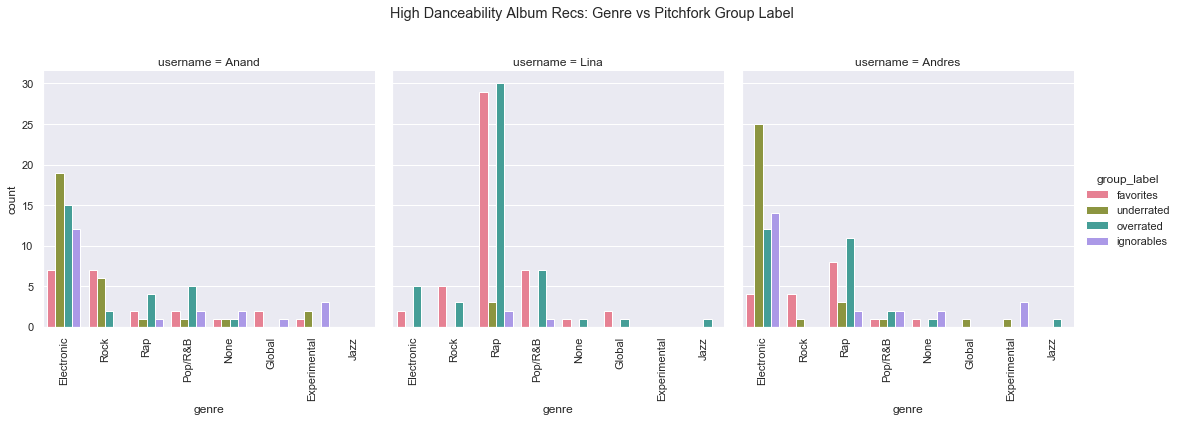

In [22]:
hue_order = ['favorites', 'underrated', 'overrated', 'ignorables']
g = sns.catplot(x="genre", hue="group_label", hue_order = hue_order, col="username",
                data=combined_alb_recs_hDanc_100, kind="count", col_wrap=3, palette="husl");
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('High Danceability Album Recs: Genre vs Pitchfork Group Label');



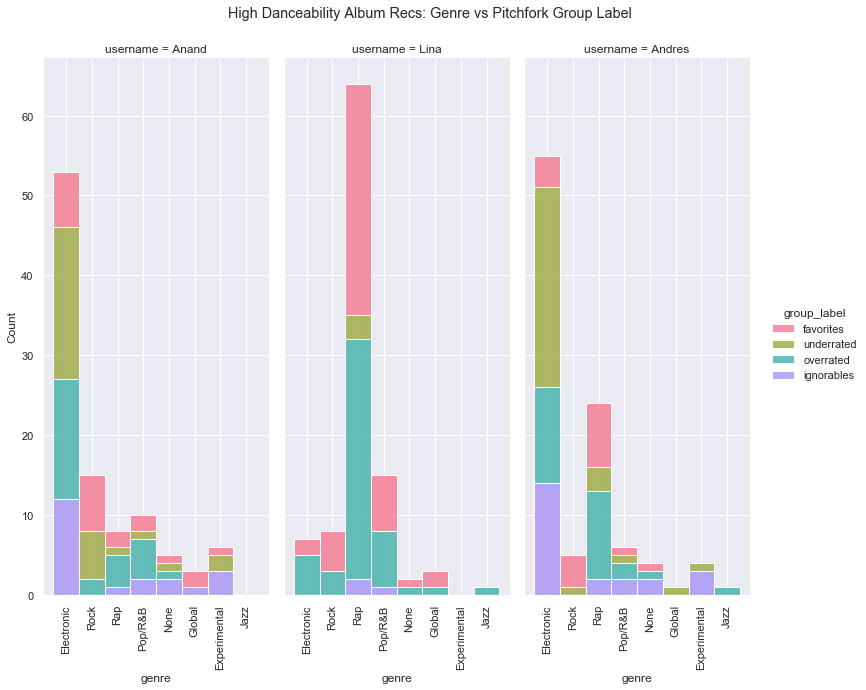

In [23]:
hue_order = ['favorites', 'underrated', 'overrated', 'ignorables']
g = sns.displot(data=combined_alb_recs_hDanc_100, x="genre", hue="group_label", hue_order=hue_order, multiple="stack", col="username", palette="husl", height=9, aspect=.4)
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('High Danceability Album Recs: Genre vs Pitchfork Group Label');



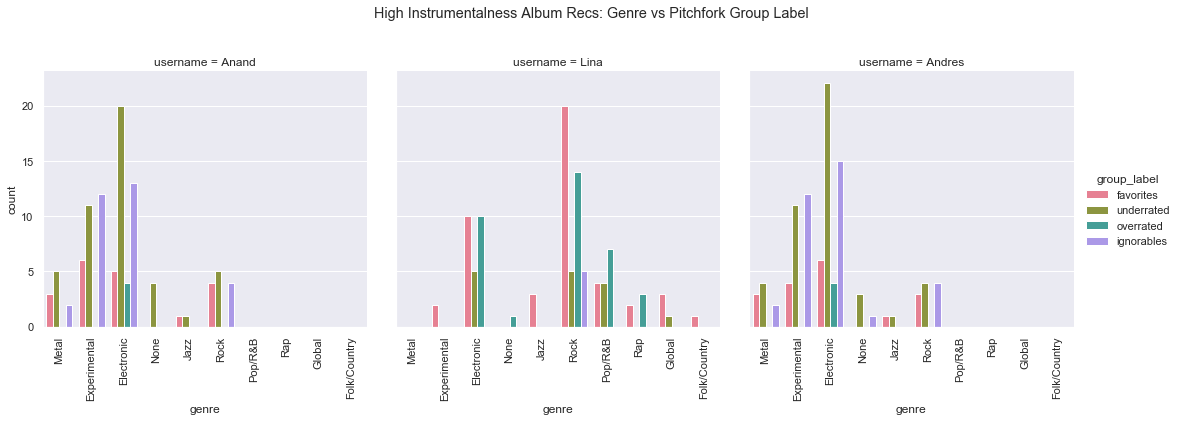

In [24]:
hue_order = ['favorites', 'underrated', 'overrated', 'ignorables']
g = sns.catplot(x="genre", hue="group_label", hue_order = hue_order, col="username",
                data=combined_alb_recs_hInstr_100, kind="count", col_wrap=3, palette="husl");
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('High Instrumentalness Album Recs: Genre vs Pitchfork Group Label');



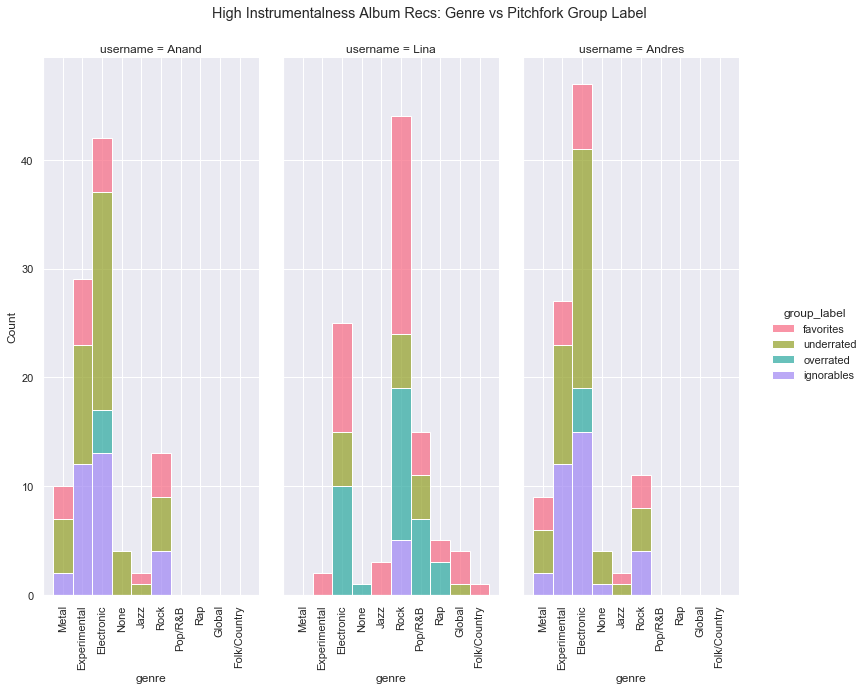

In [25]:
hue_order = ['favorites', 'underrated', 'overrated', 'ignorables']
g = sns.displot(data=combined_alb_recs_hInstr_100, x="genre", hue="group_label", hue_order=hue_order, multiple="stack", col="username", palette="husl", height=9, aspect=.4)
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('High Instrumentalness Album Recs: Genre vs Pitchfork Group Label');


## Word Clouds for our top albums

In [26]:
def plotWordCloud(df_word_cloud):
    """
    Input any df with reviews in it. Generates word clout plot for their reviews.
    """
    comment_words = ''
    additional_stopwords = set(("song", "album", "record", "music", "songs", "track", "band", "sound", "s", "t", "year"))
    stopwords =  set(STOPWORDS).union(additional_stopwords)

    df_word_cloud = df_word_cloud.review

    # iterate through the csv file
    for val in df_word_cloud:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()
        tokens = [token for token in tokens if len(token) > 1]

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10, collocations=False).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

**Plot word clouds for our top couple albums just to see**

Danceability since we have differing results

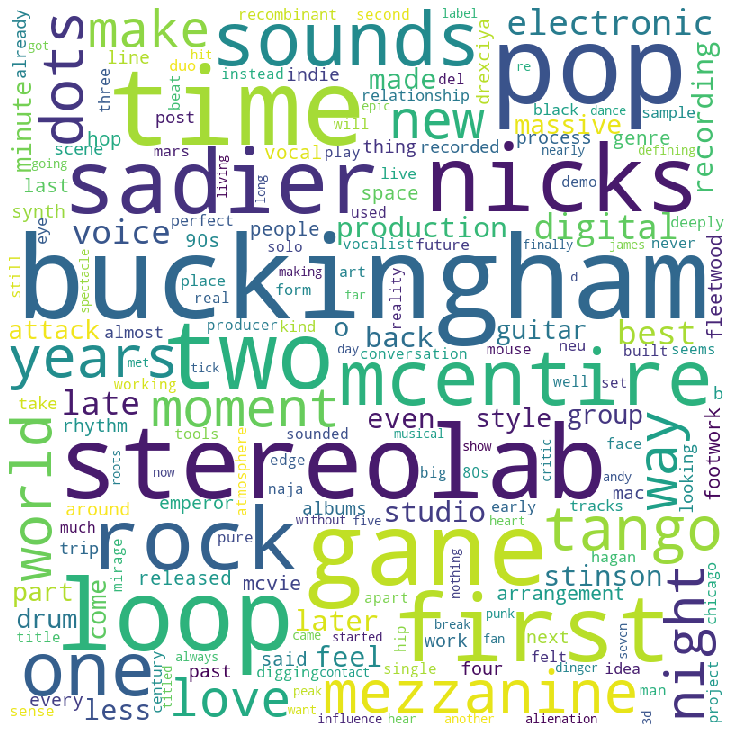

In [27]:
plotWordCloud(combined_alb_recs_hDanc_100[(combined_alb_recs_hDanc_100.username == 'Anand')].sort_values('score', ascending = False).head(5))

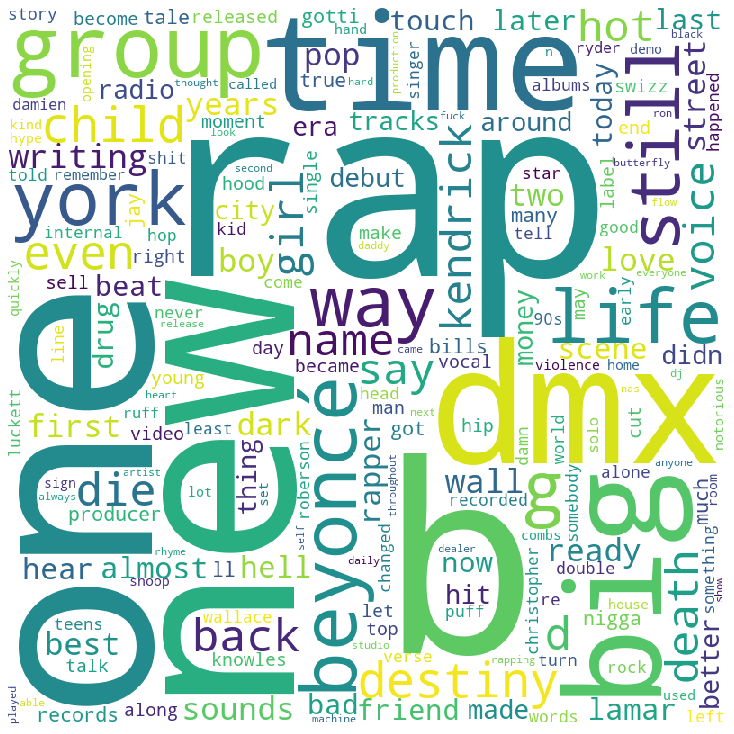

In [28]:
plotWordCloud(combined_alb_recs_hDanc_100[(combined_alb_recs_hDanc_100.username == 'Lina')].sort_values('score', ascending = False).head(5))

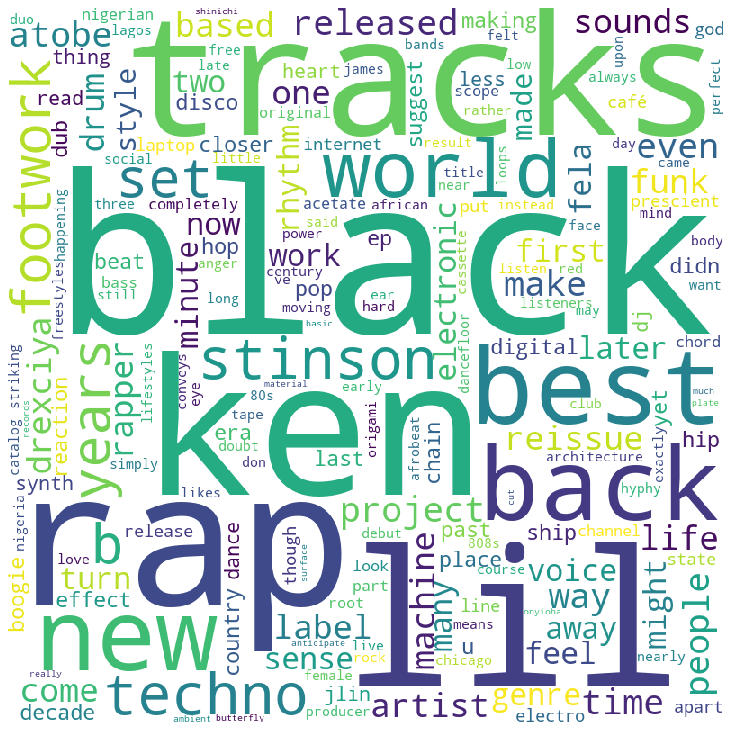

In [29]:
plotWordCloud(combined_alb_recs_hDanc_100[(combined_alb_recs_hDanc_100.username == 'Andres')].sort_values('score', ascending = False).head(5))

## Do our specific album recommendations differ significantly? 

Danceability Venn Diagram

In [30]:
A = set(alb_recs_high_danc_anand.head(100).album_uri)
print(len(A))
B = set(alb_recs_high_danc_lina.head(100).album_uri)
print(len(B))

C = set(alb_recs_high_danc_andres.head(100).album_uri)
print(len(C))
# C

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

100
100
100


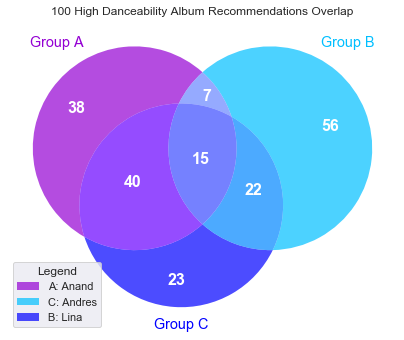

In [31]:
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Group A', 'Group B', 'Group C')  
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ['darkviolet','deepskyblue','blue']
v = venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=
          colors,alpha=0.7)   
i = 0
for text in v.set_labels:
    text.set_color(colors[i])
    i+=1

for text in v.subset_labels:
    text.set_color('white')
    text.set_fontsize(16)
    text.set_fontweight('bold')

h = [] 
for i in sets:
    h.append(v.get_patch_by_id(i)) 
l = ['A: Anand','C: Andres','B: Lina','A & C shared','A & B shared',
     'B & C shared','A & B & C shared']
# ax.legend(handles=h, labels=l, title="Legend",loc='lower left')  

ax.legend(handles=h[0:3], labels=l[0:3], title="Legend",
          loc='lower left')  

plt.title('100 High Danceability Album Recommendations Overlap')    

plt.show()

Display the overlapping albums:

In [32]:
# Generate DF for all overlaps:

# Anand & Lina
AB_only_lst = []
for alb_uri in AB_only:
    temp = alb_recs_high_danc_anand[alb_recs_high_danc_anand.album_uri == alb_uri]
    AB_only_lst.append(temp)
AB_only_df = pd.concat(AB_only_lst)
AB_only_df = AB_only_df[['album_uri', 'album', 'artist', 'best', 'date', 'genre', 'review', 'score', 'group_label']]

# Anand & Andres
AC_only_lst = []
for alb_uri in AC_only:
    temp = alb_recs_high_danc_anand[alb_recs_high_danc_anand.album_uri == alb_uri]
    AC_only_lst.append(temp)
AC_only_df = pd.concat(AC_only_lst)
AC_only_df = AC_only_df[['album_uri', 'album', 'artist', 'best', 'date', 'genre', 'review', 'score', 'group_label']]

# Andres & Lina
BC_only_lst = []
for alb_uri in BC_only:
    temp = alb_recs_high_danc_anand[alb_recs_high_danc_anand.album_uri == alb_uri]
    BC_only_lst.append(temp)
BC_only_df = pd.concat(BC_only_lst)
BC_only_df = BC_only_df[['album_uri', 'album', 'artist', 'best', 'date', 'genre', 'review', 'score', 'group_label']]

# All 3 users
ABC_overlap_lst = []
for alb_uri in ABC_overlap:
    temp = alb_recs_high_danc_anand[alb_recs_high_danc_anand.album_uri == alb_uri]
    ABC_overlap_lst.append(temp)
ABC_overlap_df = pd.concat(ABC_overlap_lst)
ABC_overlap_df = ABC_overlap_df[['album_uri', 'album', 'artist', 'best', 'date', 'genre', 'review', 'score', 'group_label']]
# ABC_overlap_df

In [33]:
AB_only_df.sort_values('score', ascending=False)

,album_uri,album,artist,best,date,genre,review,score,group_label
587,spotify:album:4AsXQ17Arq1cUVoa9dKJ3F,Tango in the Night,Fleetwood Mac,1,March 11 2017,Rock,Best new reissue Tango in the Night is the fin...,8.7000,favorites
718,spotify:album:59Bbr32pMTFHlUb8Nv1Kr0,Fin,Syd,0,February 8 2017,Pop/R&B,"Syd, the charismatic songwriter and performer ...",8.1000,favorites
145,spotify:album:18JrBX1QkpnUSJF3oxX6RX,At What Cost,GoldLink,0,April 11 2017,Rap,The D.C. rapper’s major label debut is made of...,7.5000,favorites
146,spotify:album:19lVMS3ZOoJi5CdRKvoOiP,TLC,TLC,0,July 6 2017,Pop/R&B,"With the final TLC album, Chilli and T-Boz hav...",7.4000,favorites
780,spotify:album:5bCk3kWAy2JbbTfHqzZCII,"Passion, Pain & Demon Slayin’",Kid Cudi,0,December 20 2016,Rap,"Scott Mescudi’s latest tome, the 87-minute **P...",6.7000,overrated
249,spotify:album:1saoZHjleM0tAQQoCvpMrB,Bedtime Stories,Madonna,0,August 16 2017,Pop/R&B,"Released in 1994, the warm and mellow sound of...",6.5000,overrated
219,spotify:album:1esJd1JGPa7jDRAKrYs6ls,1992 Deluxe,Princess Nokia,0,September 12 2017,Rap,On her newly reissued and expanded 2016 mixtap...,6.2000,overrated


In [34]:
AC_only_df.sort_values('score', ascending=False)

,album_uri,album,artist,best,date,genre,review,score,group_label
935,spotify:album:6m5Jy89Af4LWormzjaMPKd,Black Origami,Jlin,1,May 18 2017,Electronic,Best new music The sophomore album from the br...,8.8000,underrated
600,spotify:album:4HuzPUi36WvuyGWKUcQEkt,Lifestyles of the Laptop Café,The Other People Place,1,February 13 2017,Electronic,Best new reissue The only record by Drexciya’s...,8.8000,favorites
853,spotify:album:6BWEE9KtvaXOZTGX17CUbb,AS TRUTH,Amnesia Scanner,0,February 20 2017,Experimental,Electronic music at the moment may not get mor...,8.0000,underrated
568,spotify:album:43jw6At0Gb7B7No6x0G7L2,Anguilla Electrica,Porter Ricks,0,July 8 2017,Electronic,The dub techno duo’s first new record since 19...,8.0000,underrated
896,spotify:album:6VTTkMIKHhmFsZkKXsvS5I,Goths,The Mountain Goats,0,May 22 2017,Rock,John Darnielle's latest is a richly detailed c...,8.0000,favorites
663,spotify:album:4fxpBVBg2qKcqWP4cQDwS6,Selectors 002,Young Marco,0,February 17 2017,Electronic,Amsterdam DJ Young Marco Sterk mixes Buchla ex...,7.9000,underrated
1008,spotify:album:7IBbf97mZsLp8lncGYJRPi,Pariah,Jana Rush,0,July 25 2017,Electronic,"Twenty years into her career, after a hiatus o...",7.9000,underrated
469,spotify:album:3Lirpp3wYW5mYlEawXDNa1,"Nídia é Má, Nídia é Fudida",Nídia,0,July 11 2017,Electronic,"With her own strain of batida music, the Portu...",7.8000,underrated
679,spotify:album:4sZvkjrogy7HbQ0M5CNCEL,Modern Species,DJ Sports,0,June 15 2017,Electronic,Denmark’s DJ Sports makes experimental dance m...,7.8000,underrated
79,spotify:album:0dhWdoFP6zgSavj2jcNCr3,Omnion,Hercules and Love Affair,0,September 5 2017,Electronic,Andy Butler’s fourth album as Hercules and Lov...,7.7000,underrated


In [35]:
BC_only_df.sort_values('score', ascending=False)

,album_uri,album,artist,best,date,genre,review,score,group_label
826,spotify:album:5vvvo79z68vWj9yimoygfS,Pretty Girls Like Trap Music,2 Chainz,0,June 16 2017,Rap,Pretty Girls is the most fulfilling 2 Chainz a...,8.0000,favorites
1062,spotify:album:7zy6BF4J1cdLVZaPoTbLa7,All Blue,G Perico,0,May 5 2017,Rap,While nodding to West Coast legends of the ’90...,7.9000,underrated
1013,spotify:album:7K6OykPbezfgKgBufihn6X,HNDRXX,Future,0,March 3 2017,Rap,"Over a well-played hand of wistful, bright-eye...",7.8000,favorites
619,spotify:album:4MoVPs5mVFmZ4N6RmNTFWB,The Return of East Atlanta Santa,Gucci Mane,0,December 21 2016,Rap,The Return of East Atlanta Santa leans on the ...,7.6000,favorites
673,spotify:album:4nJ65lptuDZXNr0deIWKiU,Queen Elizabitch,CupcakKe,0,April 14 2017,Rap,The amazingly explicit Chicago rapper has begu...,7.6000,underrated
991,spotify:album:7C1MfzZy2I988m1dIEzV6o,Wamp 2 Dem,Giggs,0,October 18 2017,Rap,With top-shelf beats and assists from A-list c...,7.5000,favorites
710,spotify:album:55dc5LEBgBIBe8RgbN83Et,MrLA,RJ,0,May 30 2017,Rap,RJ’s music comes from the heart of Los Angeles...,7.5000,favorites
910,spotify:album:6bseFkqeoLaVOaPshnB34o,Boomiverse,Big Boi,0,June 19 2017,Rap,Big Boi returns with a collection of shiny ban...,7.4000,favorites
882,spotify:album:6QC8G4HVk9lkbpxugU7ZgF,The Space Between,Majid Jordan,0,November 1 2017,Pop/R&B,The refined sophomore album from Majid Jordan—...,7.4000,favorites
353,spotify:album:2aTOwGU66ocsf8IQpOI0XZ,Mr. Davis,Gucci Mane,0,October 19 2017,Rap,Seventeen months since his release from prison...,7.4000,favorites


In [36]:
ABC_overlap_df.sort_values('score', ascending=False)

,album_uri,album,artist,best,date,genre,review,score,group_label
379,spotify:album:2kEqaFXOjqbwd6nKci9pEX,"Doing It in Lagos: Boogie, Pop & Disco in 1980...",Various Artists,1,January 10 2017,None,Best new reissue This prescient reissue delive...,8.5000,favorites
224,spotify:album:1hXSxD7wpxEHXiLkk69EaQ,Life Will See You Now,Jens Lekman,0,February 22 2017,Rock,"On his fourth album, Jens Lekman opens up in n...",8.0000,favorites
903,spotify:album:6XzoFb3hP14jVQeCMRdVJR,This Old Dog,Mac DeMarco,0,May 4 2017,Rock,"On his third album, the antics of Mac DeMarco ...",7.9000,favorites
44,spotify:album:0NBTBo1qrg554sAj79nEqD,Mura Masa,Mura Masa,0,July 18 2017,Electronic,Alex Crossan’s debut album is a love letter to...,7.7000,favorites
355,spotify:album:2agSsSBnKnby355ncQpQGu,The Best of Both Worlds,Honey Dijon,0,October 26 2017,Electronic,"A glorious vision of house music’s inclusive, ...",7.5000,favorites
460,spotify:album:3IbY6WzMWrPx7ZnqMfEkd6,Electric Lines,Joe Goddard,0,April 17 2017,Electronic,The Hot Chip founding member’s first official ...,7.2000,overrated
198,spotify:album:1TeREorFy8BVBPlu7MDrPB,Yaeji EP,Yaeji,0,March 30 2017,Electronic,The New York and Seoul-based Kathy Yaeji Lee i...,7.1000,overrated
149,spotify:album:1AdGPDSoxccLy8XKwzJNny,Big Trouble Little Jupiter,Kodie Shane,0,January 25 2017,Rap,"Though not her best work, Big Trouble Little J...",7.1000,ignorables
955,spotify:album:6upTR3RFKR7K20OnHRXDkL,Teenage Emotions,Lil Yachty,0,May 26 2017,Rap,Yachty is our master of joy. His debut album i...,6.8000,overrated
244,spotify:album:1qyjZGIeeLJlXbYWuoloWj,Nervous System,Julia Michaels,0,August 4 2017,Pop/R&B,After penning hits for Selena Gomez and Hailee...,6.6000,overrated


Instrumentalness Venn Diagram

100
100
100


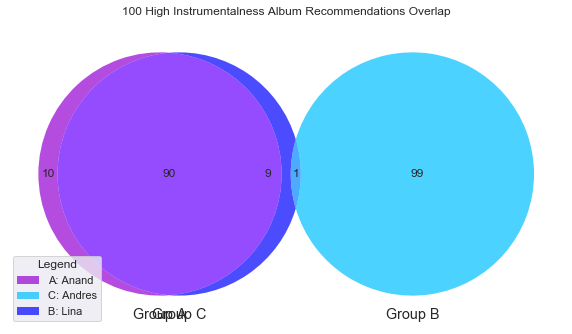

In [37]:
A = set(alb_recs_high_instr_anand.head(100).album_uri)
print(len(A))
B = set(alb_recs_high_instr_lina.head(100).album_uri)
print(len(B))

C = set(alb_recs_high_instr_andres.head(100).album_uri)
print(len(C))
# C

AB_overlap = A & B  #compute intersection of set A & set B
# print(AB_overlap)
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Group A', 'Group B', 'Group C')  
plt.figure(figsize=(10,7))
ax = plt.gca()
colors = ['darkviolet','deepskyblue','blue']
v = venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=
          colors,alpha=0.7)   
# i = 0
# for text in v.set_labels:
#     text.set_color(colors[i])
#     i+=1

# for text in v.subset_labels:
#     text.set_color('white')
#     text.set_fontsize(16)
#     text.set_fontweight('bold')

h = [] 
for i in sets:
    h.append(v.get_patch_by_id(i)) 
l = ['A: Anand','C: Andres','B: Lina','A & C shared','A & B shared',
     'B & C shared','A & B & C shared']
# ax.legend(handles=h, labels=l, title="Legend",loc='lower left')  

ax.legend(handles=h[0:3], labels=l[0:3], title="Legend",
          loc='lower left')  

plt.title('100 High Instrumentalness Album Recommendations Overlap')    

plt.show()

In [38]:
# Generate DF for all overlaps:

# Anand & Lina
AB_only_lst2 = []
for alb_uri in AB_only:
    temp = alb_recs_high_danc_anand[alb_recs_high_danc_anand.album_uri == alb_uri]
    AB_only_lst2.append(temp)
if len(AB_only_lst2) > 0:
    AB_only_instr_df = pd.concat(AB_only_lst2)
    AB_only_instr_df = AB_only_instr_df[['album_uri', 'album', 'artist', 'best', 'date', 'genre', 'review', 'score', 'group_label']]

# Anand & Andres
AC_only_lst2 = []
for alb_uri in AC_only:
    temp = alb_recs_high_danc_anand[alb_recs_high_danc_anand.album_uri == alb_uri]
    AC_only_lst2.append(temp)
AC_only_instr_df = pd.concat(AC_only_lst2)
AC_only_instr_df = AC_only_instr_df[['album_uri', 'album', 'artist', 'best', 'date', 'genre', 'review', 'score', 'group_label']]

# Andres & Lina
BC_only_lst2 = []
for alb_uri in BC_only:
    temp = alb_recs_high_danc_anand[alb_recs_high_danc_anand.album_uri == alb_uri]
#     temp.reset_index(drop=True, inplace=True)
    BC_only_lst2.append(temp)
print(len(BC_only_lst2))
BC_only_instr_df = pd.concat(BC_only_lst2)
BC_only_instr_df = BC_only_instr_df[['album_uri', 'album', 'artist', 'best', 'date', 'genre', 'review', 'score', 'group_label']]
print(BC_only_instr_df.shape[0])

# All 3 users
ABC_overlap_lst = []
for alb_uri in ABC_overlap:
    temp = alb_recs_high_danc_anand[alb_recs_high_danc_anand.album_uri == alb_uri]
    ABC_overlap_lst.append(temp)
if len(ABC_overlap_lst) > 0:
    ABC_overlap_instr_df = pd.concat(ABC_overlap_lst)
    ABC_overla_instr_df = ABC_overlap_instr_df[['album_uri', 'album', 'artist', 'best', 'date', 'genre', 'review', 'score', 'group_label']]
# ABC_overlap_df

1
1


In [39]:
AC_only_instr_df.sort_values('score', ascending=False)

,album_uri,album,artist,best,date,genre,review,score,group_label
600,spotify:album:4HuzPUi36WvuyGWKUcQEkt,Lifestyles of the Laptop Café,The Other People Place,1,February 13 2017,Electronic,Best new reissue The only record by Drexciya’s...,8.8000,favorites
190,spotify:album:1PSdRrBbLSy0072kvNyZfE,Ten Years Alive on the Infinite Plain,Tony Conrad,1,June 3 2017,Experimental,"Best new reissue This dynamic, captivating 197...",8.4000,underrated
16,spotify:album:08D82ZRwILKuKetAPxRTay,Miracle Steps (Music From the Fourth World 198...,Various Artists,0,April 15 2017,None,Devised by Optimo’s JD Twitch and NTS Radio’s ...,8.3000,underrated
691,spotify:album:4zGRKlgHQox3JzJHXquI0s,Phantom Brickworks,Bibio,0,November 4 2017,Electronic,The restless UK electronic musician sets aside...,8.2000,favorites
753,spotify:album:5PfXgN1QUM9hpwdyyDeB5N,Land of Look Behind,K. Leimer,0,February 3 2017,Electronic,"In the ’80s underground, the Pacific Northwest...",8.2000,underrated
...,...,...,...,...,...,...,...,...,...
390,spotify:album:2oamslsaTYIG8a1faIeKyj,Hopes of Failure,Aseethe,0,March 3 2017,Rock,The Iowa City doom trio’s latest streamlines t...,6.0000,ignorables
45,spotify:album:0NHO2hGPIzBBEIJ6ZBUsTn,Demolition 9,Martin Rev,0,June 3 2017,Electronic,The dizzying new album from Suicide’s Martin R...,6.0000,ignorables
902,spotify:album:6XmX3zflDoS8NWEEQQD9p4,Stone Garden,Kikagaku Moyo,0,May 27 2017,Experimental,"In the clubs of Tokyo, psych-rockers Kikagaku ...",6.0000,ignorables
856,spotify:album:6CaF3lw0PDQLyT6H2HOdat,Shanghai,College,0,April 28 2017,Experimental,David Grellier returns with a collection of fi...,5.9000,ignorables


In [40]:
BC_only_instr_df.sort_values('score', ascending=False)

,album_uri,album,artist,best,date,genre,review,score,group_label
677,spotify:album:4psDRFbIlUM1KUb1omccXo,Bicep,Bicep,0,August 30 2017,Electronic,"On their debut album, the Irish duo Bicep—foun...",7.4000,favorites


In [41]:
# Anand Only
A_rest_lst = []
for alb_uri in A_rest:
    temp = alb_recs_high_danc_anand[alb_recs_high_danc_anand.album_uri == alb_uri]
    A_rest_lst.append(temp)
if len(A_rest_lst) > 0:
    A_only_instr_df = pd.concat(A_rest_lst)
    A_only_instr_df = A_only_instr_df[['album_uri', 'album', 'artist', 'best', 'date', 'genre', 'review', 'score', 'group_label']]
A_only_instr_df.sort_values('score', ascending=False)

,album_uri,album,artist,best,date,genre,review,score,group_label
373,spotify:album:2g4i8tiNEGn1dCNYeuvixB,Metal Machine Music,Lou Reed,0,December 3 2017,Rock,Lou Reed’s 1975 album has been called one of t...,8.7000,underrated
26,spotify:album:0CNDCFHe5E0EYQT39CwgNA,No Home of the Mind,Bing & Ruth,0,February 21 2017,Experimental,"On his third proper Bing & Ruth album, and fir...",8.2000,favorites
382,spotify:album:2lsM7Py65EOtlq8BgwkXCS,Sleep Well Beast,The National,0,September 8 2017,Rock,The band’s seventh album adds more chaos to th...,8.0000,favorites
1053,spotify:album:7wdOUoAUF79Cwl27oNdS4N,So Numb,Sannhet,0,August 24 2017,Metal,Brooklyn trio Sannhet is an instrumental power...,8.0000,underrated
278,spotify:album:2445s9JDTLq5vOBj3P84Te,New Gen,Various Artists,0,February 4 2017,None,This 17-track compilation on XL Recordings off...,7.9000,underrated
614,spotify:album:4M33Lu2f5yApwDiPjVKXTl,Reflection,Brian Eno,0,January 4 2017,Experimental,Eno's new ambient piece readily slots along wo...,7.7000,favorites
395,spotify:album:2sB7YlLZuBhoQjovV8bZTW,Grafts,Kara-Lis Coverdale,0,May 3 2017,Electronic,Grafts is the latest release from Montreal com...,7.7000,underrated
134,spotify:album:12avkVNE9fjNYp7S2Va6Th,Infinity Ultra,Claude Speeed,0,July 18 2017,Electronic,With songs that travel great distances between...,7.4000,underrated
366,spotify:album:2eOMttZbB9lBc9LLMj56xj,Luciferian Towers,Godspeed You! Black Emperor,0,September 21 2017,Rock,The sound of Godspeed’s radical fury takes a s...,7.3000,favorites
434,spotify:album:35SbiiiXGWkW8hJLiMh1LD,Traditional Music of Notional Species Vol. II,Rashad Becker,0,December 23 2016,Electronic,The second volume in Rashad Becker’s series is...,6.8000,ignorables


In [42]:
# Andres Only
C_rest_lst = []
for alb_uri in C_rest:
    temp = alb_recs_high_danc_anand[alb_recs_high_danc_anand.album_uri == alb_uri]
    C_rest_lst.append(temp)
if len(C_rest_lst) > 0:
    C_only_instr_df = pd.concat(C_rest_lst)
    C_only_instr_df = C_only_instr_df[['album_uri', 'album', 'artist', 'best', 'date', 'genre', 'review', 'score', 'group_label']]
C_only_instr_df.sort_values('score', ascending=False)

,album_uri,album,artist,best,date,genre,review,score,group_label
1015,spotify:album:7LxHS4ytb26Ilha9QzxDSK,Colón Man,Equiknoxx,0,November 30 2017,Electronic,The first proper LP from Equiknoxx is a clear ...,8.1000,underrated
690,spotify:album:4yj4G8FQiDvOAB9HSTBnkJ,Riding the Thin Line EP,DJ Bone,0,July 29 2017,Electronic,A fundamental EP from the Detroit techno titan...,7.6000,underrated
104,spotify:album:0qGwNy1b6cJRtQ3Agq3ZDN,DJ-Kicks,Matthew Dear,0,January 24 2017,Electronic,Matthew Dear’s contribution to the DJ-Kicks se...,7.4000,underrated
647,spotify:album:4YpLMgttsRcBwoXISagAqR,Black Populous,AceMo,0,May 13 2017,Electronic,Composed on hardware and recorded straight to ...,7.3000,underrated
604,spotify:album:4IVYDbl6kEWudawwIDQoLh,Time Well,Cloakroom,0,August 21 2017,Rock,"Though longer and mellower, Cloakroom’s second...",7.3000,favorites
257,spotify:album:1wH5XiC1pl8h0iVA5fQXUD,Terra Incognita,Various Artists,0,August 21 2017,None,Drawing from two long-out-of-print compilation...,7.2000,ignorables
441,spotify:album:39cC5nA0ZkPEdZCu3EGErS,Trust Me EP,Mr. Tophat,0,January 19 2017,Electronic,Scandinavian house and disco producer Mr. Toph...,7.1000,ignorables
828,spotify:album:5wWwfGL7DeXBJuW0edyJFD,Auto-Reverse,Le Car,0,February 11 2017,Electronic,"In the late ’90s, two art students in Detroit ...",6.8000,ignorables
515,spotify:album:3gR0NM8LcsICg62LydfBlZ,How I Creep,Collin Strange,0,April 27 2017,Electronic,Producer and DJ Collin Strange draws inspirati...,6.8000,ignorables


In [43]:
# Lina Only
B_rest_lst = []
for alb_uri in B_rest:
    temp = alb_recs_high_danc_anand[alb_recs_high_danc_anand.album_uri == alb_uri]
    B_rest_lst.append(temp)
if len(B_rest_lst) > 0:
    B_only_instr_df = pd.concat(B_rest_lst)
    B_only_instr_df = B_only_instr_df[['album_uri', 'album', 'artist', 'best', 'date', 'genre', 'review', 'score', 'group_label']]
B_only_instr_df.sort_values('score', ascending=False)

,album_uri,album,artist,best,date,genre,review,score,group_label
432,spotify:album:3539EbNgIdEDGBKkUf4wno,Dummy,Portishead,0,April 23 2017,Electronic,Portishead's 1994 debut is a masterwork of dow...,9.5000,favorites
304,spotify:album:2GbNeQEg5fLtuxjr5nlIpc,American Water,Silver Jews,0,July 30 2017,Rock,"In 1998, David Berman approached perfection. A...",9.4000,favorites
24,spotify:album:0BiNb8HYR4JvuxUa31Z58Q,Automatic for the People,R.E.M.,1,November 14 2017,Rock,"Best new reissue In 1992, R.E.M. were the bigg...",9.3000,favorites
581,spotify:album:49MNmJhZQewjt06rpwp6QR,Mezzanine,Massive Attack,0,January 8 2017,Electronic,"On Mezzanine, Massive Attack tried to escape t...",9.3000,favorites
403,spotify:album:2vTelM2ZV20cLPqQwfWhYa,Dots and Loops,Stereolab,0,July 23 2017,Experimental,Stereolab’s masterpiece fused analog with digi...,9.2000,favorites
...,...,...,...,...,...,...,...,...,...
415,spotify:album:30IYNZBjrCEcRb5MRwUm9b,Season High,Little Dragon,0,April 14 2017,Electronic,Despite the best efforts of Yukimi Nagano's dy...,5.6000,overrated
28,spotify:album:0CZ8vYh13Jl7h9xNmfNGL6,Voyager,Vitalic,0,January 26 2017,Electronic,There are glimpses of Vitalic's old energy on ...,5.4000,overrated
886,spotify:album:6S9YaGXnmRe8tWJ0e457HP,Songs of Experience,U2,0,December 4 2017,Rock,"Years in the making, U2’s 14th studio album fi...",5.3000,overrated
664,spotify:album:4g3qNgrLn8qyubBi0wqVZH,ununiform,Tricky,0,September 20 2017,Electronic,"On his 13th studio album, Tricky translates ne...",5.1000,overrated
